In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
Kyphosis = pd.read_csv('dataset/kyphosis.csv')
Kyphosis.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(Kyphosis, title="Kyphosis Data Report")

In [4]:
profile.to_file("Kyphosis_Data_Report.html")

In [5]:
Kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
Kyphosis.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


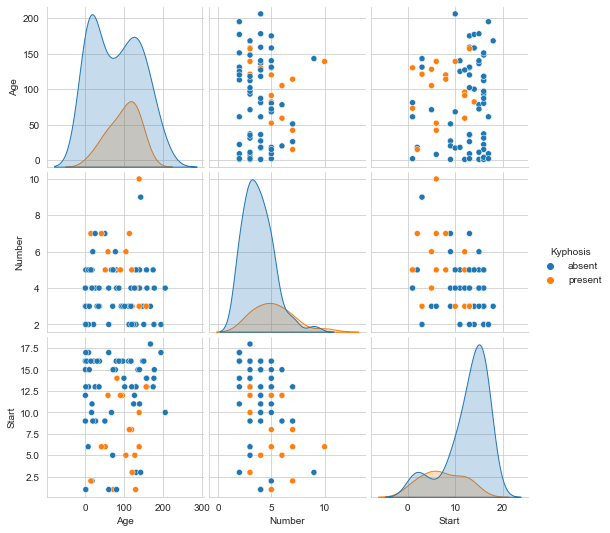

In [7]:
sns.pairplot(Kyphosis, hue='Kyphosis')

<AxesSubplot:>

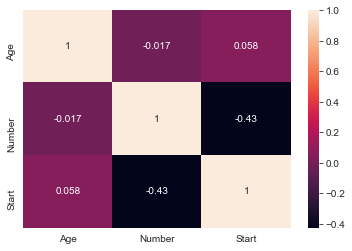

In [8]:
sns.heatmap(Kyphosis.corr(), annot=True)

In [9]:
X = Kyphosis.drop('Kyphosis', axis=1)
y = Kyphosis['Kyphosis']
X.head(), y.head()

(   Age  Number  Start
 0   71       3      5
 1  158       3     14
 2  128       4      5
 3    2       5      1
 4    1       4     15,
 0     absent
 1     absent
 2    present
 3     absent
 4     absent
 Name: Kyphosis, dtype: object)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dis_tree = DecisionTreeClassifier()

dis_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
pred = dis_tree.predict(X_test)

In [13]:
from sklearn.model_selection import cross_val_score

def print_cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    
    print('=====================================')
    print('CROSS VALIDATION')
    print(pred.mean())
    print('=====================================')

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

def print_evaluate(true, predicted):
    cls_report = classification_report(true, predicted)
    cfn_matrix = confusion_matrix(true, predicted)
    
    print('=====================================')
    print('MODEL EVALUATION')
    print('Classification Report: ')
    print(cls_report)
    print('Confusion Matrix: ')
    print(cfn_matrix)
    print('=====================================')

In [15]:
print_cross_val(dis_tree)
print_evaluate(y_test, pred)

CROSS VALIDATION
0.7513888888888889
MODEL EVALUATION
Classification Report: 
              precision    recall  f1-score   support

      absent       0.78      0.95      0.86        19
     present       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25

Confusion Matrix: 
[[18  1]
 [ 5  1]]


[Text(741.09375, 996.6, 'Start <= 8.5\ngini = 0.316\nsamples = 56\nvalue = [45, 11]\nclass = K'),
 Text(523.125, 815.4000000000001, 'Start <= 4.0\ngini = 0.48\nsamples = 15\nvalue = [6, 9]\nclass = y'),
 Text(348.75, 634.2, 'Age <= 130.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = K'),
 Text(261.5625, 453.0, 'Age <= 101.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = K'),
 Text(174.375, 271.79999999999995, 'Number <= 6.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = K'),
 Text(87.1875, 90.59999999999991, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = K'),
 Text(261.5625, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = y'),
 Text(348.75, 271.79999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = y'),
 Text(435.9375, 453.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = K'),
 Text(697.5, 634.2, 'Number <= 3.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = y'),
 Text(610.3125, 453.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\ncla

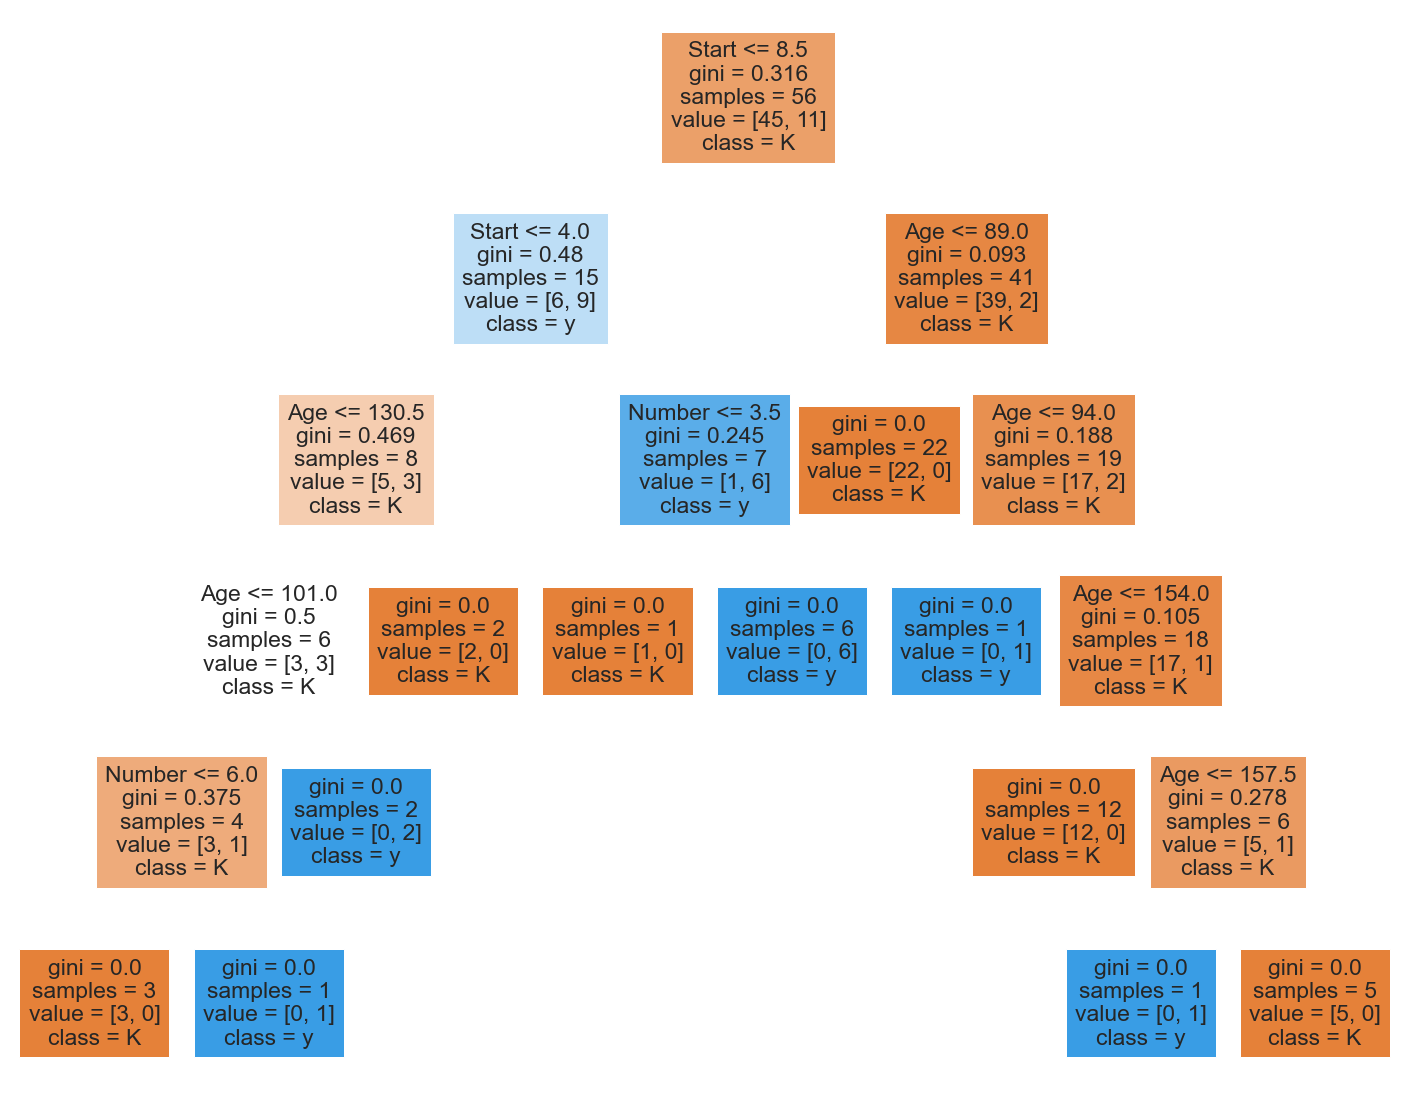

In [16]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(dis_tree, feature_names=['Age', 'Number', 'Start'], class_names='Kyphosis', filled=True)